In [22]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [23]:
data = pd.read_csv('data.csv')

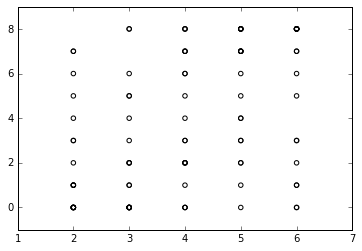

In [24]:
plt.scatter(data.x,data.y,facecolor='none')
plt.show()

In [25]:
data.x_c = sm.add_constant(data.x)
data['N-y'] = data['N'] - data['y']

In [26]:
result = sm.GLM(data[['y','N-y']],data.x_c,family=sm.families.Binomial()).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           ['y', 'N-y']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -322.80
Date:                Sun, 24 Jul 2016   Deviance:                       513.84
Time:                        17:01:55   Pearson chi2:                     428.
No. Iterations:                     6                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -2.1487      0.237     -9.057      0.000        -2.614    -1.684
x              0.5104      0.056      9.179      0.000         0.401     0.619
==============================================================================
"""

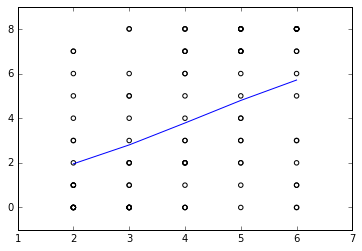

In [27]:
plt.scatter(data.x,data.y,facecolor='none')
plt.plot(data.x,result.predict()*8)
plt.show()

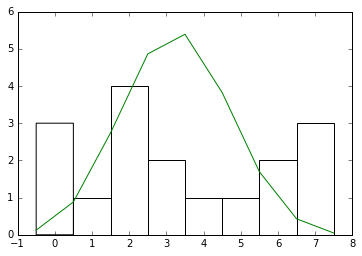

In [45]:
x = np.arange(-0.5,8.5,1)
x_int = np.arange(0,9,1)
plt.hist(data.y[data.x==4],bins=x,facecolor='none')
plt.plot(x,stats.binom.pmf(x_int,8,0.47)*20)
plt.show()

In [46]:
data[data.x==4].y.describe()

count    20.000000
mean      4.050000
std       2.892367
min       0.000000
25%       2.000000
50%       3.500000
75%       7.000000
max       8.000000
Name: y, dtype: float64

In [47]:
data[data.x==4].y.var()

8.365789473684211

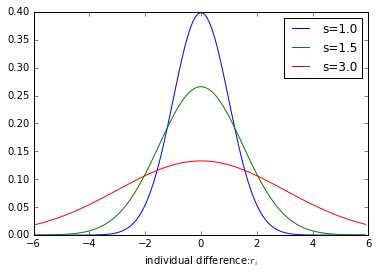

In [55]:
x = np.arange(-6,6,0.1)
plt.plot(x,stats.norm.pdf(x,0,1),label='s=1.0')
plt.plot(x,stats.norm.pdf(x,0,1.5),label='s=1.5')
plt.plot(x,stats.norm.pdf(x,0,3),label='s=3.0')
plt.legend(loc='upper right')
plt.xlabel('individual difference:$r_{i}$')
plt.show()

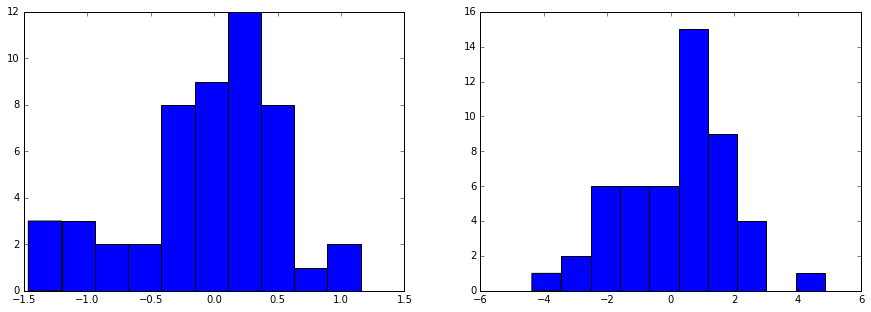

In [131]:
r1 = np.random.normal(0,0.5**0.5,50)
r2 = np.random.normal(0,3.0**0.5,50)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(r1)
ax2.hist(r2)
plt.show()

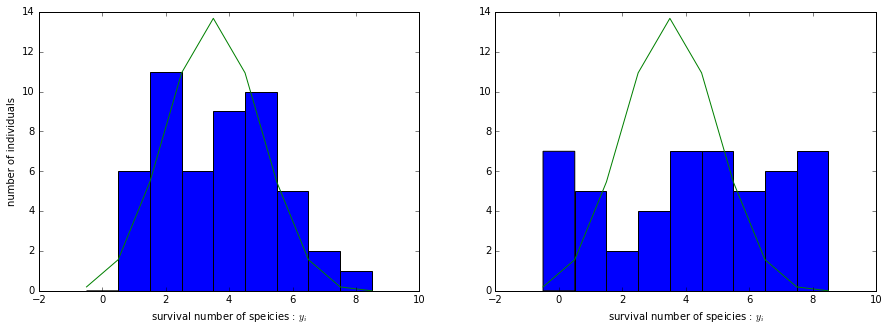

3.2576 7.1824


In [140]:
x = np.arange(-0.5,9.5,1)
x_int = np.arange(0,10,1)
q1 = 1 / (1+np.exp(-r1))
q2 = 1 / (1+np.exp(-r2))
sample1 = np.random.binomial(8,q1)
sample2 = np.random.binomial(8,q2)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.hist(sample1,bins=x)
ax1.plot(x,stats.binom.pmf(x_int,8,0.5)*50)
ax1.set(xlabel='survival number of speicies : $y_{i}$',ylabel='number of individuals')

ax2.hist(sample2,bins=x)
ax2.plot(x,stats.binom.pmf(x_int,8,0.5)*50)
ax2.set(xlabel='survival number of speicies : $y_{i}$')

plt.show()
print sample1.var(),sample2.var()

In [168]:
from statsmodels.regression.mixed_linear_model import MixedLM
model = MixedLM(endog=data[['y','N-y']],exog=data.x_c,groups=data['id']).fit()

ValueError: could not broadcast input array from shape (2,2) into shape (2)

In [153]:
model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: y        
No. Observations: 100     Method:             REML     
No. Groups:       100     Scale:              3.8413   
Min. group size:  1       Likelihood:         -243.9164
Max. group size:  1       Converged:          Yes      
Mean group size:  1.0                                  
-------------------------------------------------------
               Coef. Std.Err.   z   P>|z| [0.025 0.975]
-------------------------------------------------------
const          0.010    0.832 0.012 0.990 -1.620  1.640
x              0.950    0.196 4.847 0.000  0.566  1.334
Intercept RE   3.841                                   
=======================================================

"""

ImportError: No module named LikelihoodModelResults